In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Import the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
type(city_data)

list

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="

In [8]:
#Loop through all the cities in list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    #Create endpoint URL with each city.
    city_url = url + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hailar
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | saint-joseph
Processing Record 5 of Set 1 | labuan
Processing Record 6 of Set 1 | maningrida
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | aksu
Processing Record 13 of Set 1 | joshimath
Processing Record 14 of Set 1 | kaeo
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | muros
Processing Record 19 of Set 1 | denpasar
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | praia da vitoria
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of Set 1 | jamestown
Processing Record 24 of Set 1 | provideniya
Processing Record 25 of Se

Processing Record 42 of Set 4 | vostok
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | kemijarvi
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | omboue
Processing Record 47 of Set 4 | shulan
Processing Record 48 of Set 4 | tambacounda
Processing Record 49 of Set 4 | tocopilla
Processing Record 50 of Set 4 | karratha
Processing Record 1 of Set 5 | umtata
Processing Record 2 of Set 5 | palu
Processing Record 3 of Set 5 | grand gaube
Processing Record 4 of Set 5 | lolua
City not found. Skipping...
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | port macquarie
Processing Record 7 of Set 5 | tiarei
Processing Record 8 of Set 5 | bagotville
Processing Record 9 of Set 5 | viedma
Processing Record 10 of Set 5 | berea
Processing Record 11 of Set 5 | houma
Processing Record 12 of Set 5 | hami
Processing Record 13 of Set 5 | luang prabang
Processing Record 14 of Set 5 | dera bugti
Processing Record 15 of Set 5 | camana
Proces

Processing Record 33 of Set 8 | rassvet
Processing Record 34 of Set 8 | murphy
Processing Record 35 of Set 8 | valentin gomez farias
Processing Record 36 of Set 8 | les cayes
Processing Record 37 of Set 8 | juegang
Processing Record 38 of Set 8 | halalo
City not found. Skipping...
Processing Record 39 of Set 8 | saleaula
City not found. Skipping...
Processing Record 40 of Set 8 | vestmannaeyjar
Processing Record 41 of Set 8 | burica
City not found. Skipping...
Processing Record 42 of Set 8 | emerald
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | high prairie
Processing Record 45 of Set 8 | severomuysk
Processing Record 46 of Set 8 | los llanos de aridane
Processing Record 47 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 8 | tuatapere
Processing Record 49 of Set 8 | gazanjyk
Processing Record 50 of Set 8 | buariki
City not found. Skipping...
Processing Record 1 of Set 9 | mys shmidta
City not found. Skipping...
Processing Record

Processing Record 19 of Set 12 | palana
Processing Record 20 of Set 12 | devyatka
City not found. Skipping...
Processing Record 21 of Set 12 | bonavista
Processing Record 22 of Set 12 | jabiru
City not found. Skipping...
Processing Record 23 of Set 12 | kieta
Processing Record 24 of Set 12 | yangjiang
Processing Record 25 of Set 12 | meadow lake
Processing Record 26 of Set 12 | sakaiminato
Processing Record 27 of Set 12 | lesnikovo
Processing Record 28 of Set 12 | zanjan
Processing Record 29 of Set 12 | bismarck
Processing Record 30 of Set 12 | chivay
Processing Record 31 of Set 12 | cairns
Processing Record 32 of Set 12 | mezen
Processing Record 33 of Set 12 | garowe
Processing Record 34 of Set 12 | luanda
Processing Record 35 of Set 12 | shimoda
Processing Record 36 of Set 12 | suwannaphum
Processing Record 37 of Set 12 | evensk
Processing Record 38 of Set 12 | tukrah
Processing Record 39 of Set 12 | dodola
Processing Record 40 of Set 12 | deputatskiy
Processing Record 41 of Set 12 |

In [9]:
len(city_data)

560

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hailar,49.2000,119.7000,33.73,80,81,7.99,CN,2021-10-25 17:02:36
1,Iqaluit,63.7506,-68.5145,31.66,77,93,5.28,CA,2021-10-25 17:03:35
2,Punta Arenas,-53.1500,-70.9167,42.82,70,40,26.46,CL,2021-10-25 17:05:32
3,Saint-Joseph,-21.3667,55.6167,73.78,79,33,12.95,RE,2021-10-25 17:05:32
4,Labuan,5.2767,115.2417,78.96,79,100,2.89,MY,2021-10-25 17:05:33
5,Maningrida,-12.0667,134.2667,80.91,78,99,5.21,AU,2021-10-25 17:05:34
6,Tiksi,71.6872,128.8694,2.03,96,100,4.25,RU,2021-10-25 17:04:46
7,Rikitea,-23.1203,-134.9692,74.62,73,100,19.15,PF,2021-10-25 17:02:05
8,Bluff,-46.6000,168.3333,51.67,93,98,7.40,NZ,2021-10-25 17:05:35
9,Atuona,-9.8000,-139.0333,77.13,77,72,15.93,PF,2021-10-25 17:04:30


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_sorted_df = city_data_df[new_column_order]
city_data_sorted_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hailar,CN,2021-10-25 17:02:36,49.2000,119.7000,33.73,80,81,7.99
1,Iqaluit,CA,2021-10-25 17:03:35,63.7506,-68.5145,31.66,77,93,5.28
2,Punta Arenas,CL,2021-10-25 17:05:32,-53.1500,-70.9167,42.82,70,40,26.46
3,Saint-Joseph,RE,2021-10-25 17:05:32,-21.3667,55.6167,73.78,79,33,12.95
4,Labuan,MY,2021-10-25 17:05:33,5.2767,115.2417,78.96,79,100,2.89
5,Maningrida,AU,2021-10-25 17:05:34,-12.0667,134.2667,80.91,78,99,5.21
6,Tiksi,RU,2021-10-25 17:04:46,71.6872,128.8694,2.03,96,100,4.25
7,Rikitea,PF,2021-10-25 17:02:05,-23.1203,-134.9692,74.62,73,100,19.15
8,Bluff,NZ,2021-10-25 17:05:35,-46.6000,168.3333,51.67,93,98,7.40
9,Atuona,PF,2021-10-25 17:04:30,-9.8000,-139.0333,77.13,77,72,15.93


In [12]:
#Create output file as CSV.
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_sorted_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_sorted_df["Lat"]
max_temps = city_data_sorted_df["Max Temp"]
humidity = city_data_sorted_df["Humidity"]
cloudiness = city_data_sorted_df["Cloudiness"]
wind_speed = city_data_sorted_df["Wind Speed"]

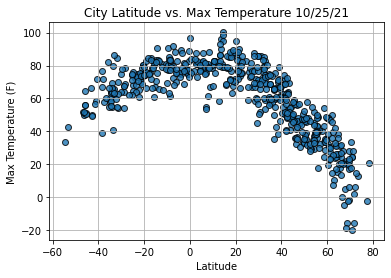

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

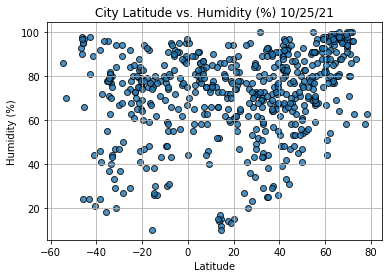

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

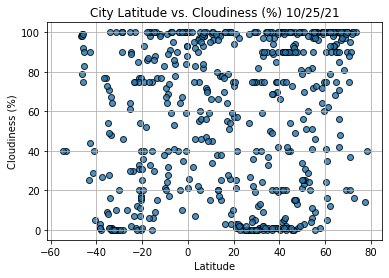

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

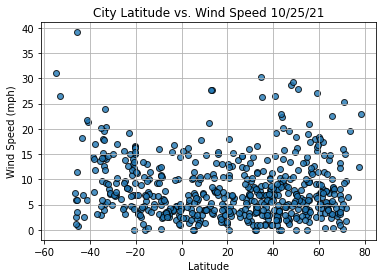

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_sorted_df.loc[13]
index13

City                         Kaeo
Country                        NZ
Date          2021-10-25 17:05:38
Lat                         -35.1
Lng                      173.7833
Max Temp                    60.33
Humidity                       96
Cloudiness                     54
Wind Speed                   2.91
Name: 13, dtype: object

In [20]:
northern_hemi_df = city_data_sorted_df.loc[(city_data_sorted_df["Lat"] >= 0)]
southern_hemi_df = city_data_sorted_df.loc[(city_data_sorted_df["Lat"] <= 0)]

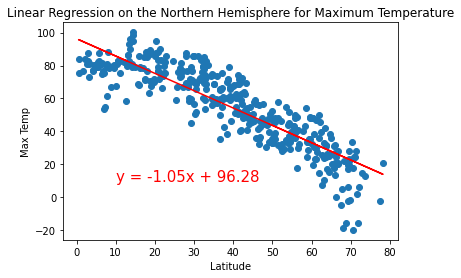

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,10))

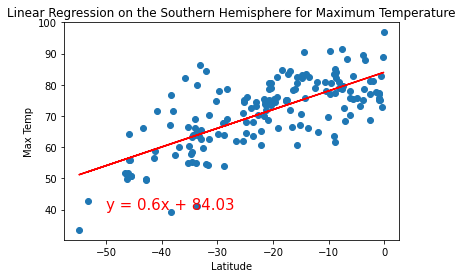

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,40))

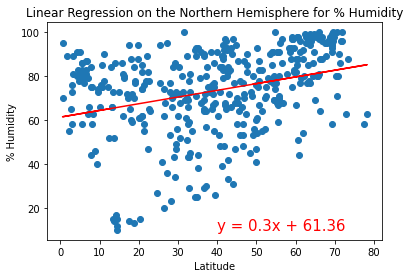

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

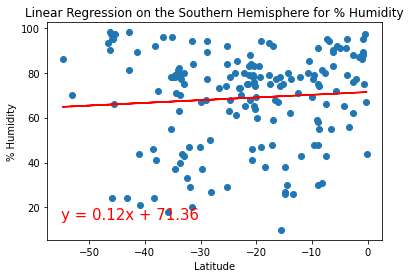

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,15))

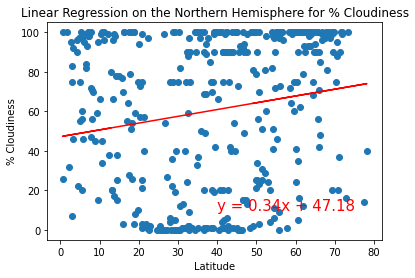

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

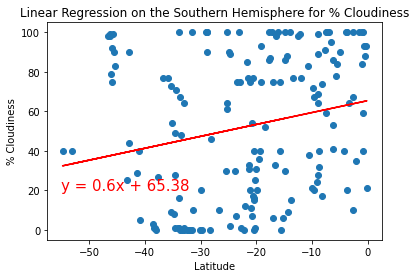

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,20))

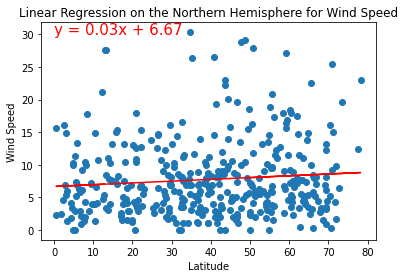

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,30))

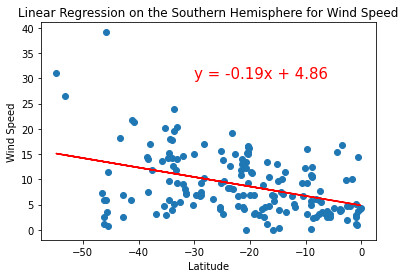

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,30))